In [1]:
import sys
sys.path.append('../src/mnist')
sys.path.append('../src')

In [2]:
from mnist_original_moe_training import *
from original_moe_training import *

/nobackup/projects/bdrap03/yamuna/miniconda/envs/mnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Image shape torch.Size([1, 28, 28])
Train samples  50000
Validation samples 10000
Test samples  10000
Imbalanced train samples  50000
Imbalanced validation samples 10000
Imbalanced test samples  10000
device cuda:1


In [3]:
from helper.collect_results import *

device cuda:1


In [4]:
# Paths to where the trained models and figures will be stored. You can change this as you see fit.
fig_path = '../figures/mnist'
model_path = '../models/mnist'
results_path = '../results/mnist'

if not os.path.exists(fig_path):
    os.mkdir(fig_path)
if not os.path.exists(model_path):
    os.mkdir(model_path)
if not os.path.exists(results_path):
    os.mkdir(results_path)        

### Collect the train error, test error, mutual information $I(E;Y)$, sample entropy $H_s$ and expert usage entropy $H_u$ for all the models trained with MNIST dataset. Store the reuslts in the '../results/mnist_results.csv' file.

In [5]:
total_experts = 5
num_classes = 10
num_epochs = 100

In [6]:
filename = 'mnist_top_k_results.csv'

In [7]:
m = 'mnist_stochastic_imbalanced'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_stochastic_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=imbalanced_testloader, 
                model_path=model_path, results_path=results_path, filename=filename)

mnist_stochastic_imbalanced_importance_0.2_10_3_models.pt
mnist_stochastic_imbalanced_importance_0.4_10_3_models.pt
mnist_stochastic_imbalanced_importance_0.6_10_3_models.pt
mnist_stochastic_imbalanced_importance_0.8_10_3_models.pt
mnist_stochastic_imbalanced_importance_1.0_10_3_models.pt


In [9]:
m = 'mnist_stochastic_imbalanced'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_stochastic_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=imbalanced_testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_0.001_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_0.01_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-06_sample_sim_diff_0.1_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-05_sample_sim_diff_0.001_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1e-05_sample_sim_diff_0.01_10_3_models.pt
mnist_stochastic_imbalanced_sample_sim_same_1

In [12]:
total_experts = 10
num_classes = 10
num_epochs = 100

In [13]:
filename = 'mnist_top_k_results.csv'

In [7]:
m = 'mnist_single_model'
collect_single_result(m, num_classes, num_epochs, testloader=testloader, 
                      model_path=model_path, results_path=results_path, filename=filename)

In [8]:
for k in range(1, 3):
    m = 'mnist_rand_init_top_'+str(k)
    collect_results(m, 'moe_top_k_model', k=k, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_top_1_10_10_models.pt
mnist_rand_init_top_2_10_10_models.pt


In [9]:
for k in range(1, 3):
    m = 'mnist_with_attn_rand_init_top_'+str(k)
    collect_results(m, 'moe_top_k_model', k=k, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_rand_init_top_1_10_10_models.pt
mnist_with_attn_rand_init_top_2_10_10_models.pt


In [10]:
m = 'mnist_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_10_10_models.pt


In [11]:
m = 'mnist_with_attn_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_rand_init_10_10_models.pt


In [12]:
m = 'mnist_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_stochastic_rand_init_10_10_models.pt


In [13]:
m = 'mnist_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_stochastic_rand_init_10_10_models.pt


In [14]:
m = 'mnist_loss_gate_rand_init'
collect_loss_gate_results(m, 'moe_expert_loss_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [15]:
m = 'mnist_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_importance_0.2_10_10_models.pt
mnist_rand_init_importance_0.4_10_10_models.pt
mnist_rand_init_importance_0.6_10_10_models.pt
mnist_rand_init_importance_0.8_10_10_models.pt
mnist_rand_init_importance_1.0_10_10_models.pt


In [16]:
m = 'mnist_with_attn_importance_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_importance_rand_init_importance_0.2_10_10_models.pt
mnist_with_attn_importance_rand_init_importance_0.4_10_10_models.pt
mnist_with_attn_importance_rand_init_importance_0.6_10_10_models.pt
mnist_with_attn_importance_rand_init_importance_0.8_10_10_models.pt
mnist_with_attn_importance_rand_init_importance_1.0_10_10_models.pt


In [17]:
m = 'mnist_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model',k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_top_2_importance_0.2_10_10_models.pt
mnist_rand_init_top_2_importance_0.4_10_10_models.pt
mnist_rand_init_top_2_importance_0.6_10_10_models.pt
mnist_rand_init_top_2_importance_0.8_10_10_models.pt
mnist_rand_init_top_2_importance_1.0_10_10_models.pt


In [18]:
m = 'mnist_with_attn_importance_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_importance_rand_init_top_2_importance_0.2_10_10_models.pt
mnist_with_attn_importance_rand_init_top_2_importance_0.4_10_10_models.pt
mnist_with_attn_importance_rand_init_top_2_importance_0.6_10_10_models.pt
mnist_with_attn_importance_rand_init_top_2_importance_0.8_10_10_models.pt
mnist_with_attn_importance_rand_init_top_2_importance_1.0_10_10_models.pt


In [19]:
m = 'mnist_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.01_10_10_models.pt
mnist_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.1_10_10_models.pt


In [20]:
m = 'mnist_with_attn_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range, 
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.01_10_10_models.pt
mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_s

In [21]:
m = 'mnist_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.01_10_10_models.pt
mnist_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.1_10_10_models.pt


In [22]:
m = 'mnist_with_attn_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.01_10_10_

In [23]:
m = 'mnist_no_gate_entropy_argmax_no_gate_T_10.0'
collect_results(m, 'moe_no_gate_entropy_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

mnist_no_gate_entropy_argmax_no_gate_T_10.0_10_10_models.pt


In [8]:
m = 'new_mnist_no_gate_self_information'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_no_gate_self_information_10_5_models.pt


In [7]:
m = 'new_mnist_no_gate_self_information'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_no_gate_self_information_10_5_models.pt


In [25]:
m = 'new_mnist_no_gate_self_information_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_no_gate_self_information_top_1_10_10_models.pt


In [26]:
m = 'new_mnist_no_gate_self_information_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_no_gate_self_information_top_2_10_10_models.pt


In [27]:
m = 'new_mnist_with_attn_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_rand_init_10_10_models.pt


In [28]:
m = 'new_mnist_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_stochastic_rand_init_10_10_models.pt


In [29]:
m = 'new_mnist_with_attn_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_rand_init_top_1_10_10_models.pt


In [30]:
m = 'new_mnist_with_attn_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_rand_init_top_2_10_10_models.pt


In [7]:
m = 'new_mnist_with_attn_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range, 
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
new_mnist_with_attn_rand_init_sample_sim_same_1e-05_sample_sim_diff_0.01_10_10_models.pt
new_mnist_wi

In [8]:
m = 'new_mnist_with_attn_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model',k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-06_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_1e-05_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.0001_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.001_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.01_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-06_sample_sim_diff_0.1_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-06_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_1e-05_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.0001_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sample_sim_same_1e-05_sample_sim_diff_0.001_10_10_models.pt
new_mnist_with_attn_rand_init_top_2_sampl

In [9]:
m = 'new_mnist_with_attn_importance_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_importance_rand_init_importance_0.2_10_10_models.pt
new_mnist_with_attn_importance_rand_init_importance_0.4_10_10_models.pt
new_mnist_with_attn_importance_rand_init_importance_0.6_10_10_models.pt
new_mnist_with_attn_importance_rand_init_importance_0.8_10_10_models.pt
new_mnist_with_attn_importance_rand_init_importance_1.0_10_10_models.pt


In [10]:
m = 'new_mnist_with_attn_importance_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

new_mnist_with_attn_importance_rand_init_top_2_importance_0.2_10_10_models.pt
new_mnist_with_attn_importance_rand_init_top_2_importance_0.4_10_10_models.pt
new_mnist_with_attn_importance_rand_init_top_2_importance_0.6_10_10_models.pt
new_mnist_with_attn_importance_rand_init_top_2_importance_0.8_10_10_models.pt
new_mnist_with_attn_importance_rand_init_top_2_importance_1.0_10_10_models.pt


In [28]:
m = 'mnist_rand_init'

temps = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 4, 6, 8, 10, 16, 20]
T_decay = [0.001, 0.01, 0.1]

collect_results(m, 'moe_expectation_model', temps=temps, T_decay=T_decay, total_experts=total_experts, num_classes=num_classes,
                num_epochs=num_epochs, testloader=testloader, model_path=model_path, results_path=results_path, 
                filename=filename)

In [29]:
m = 'mnist_stochastic_rand_init'

temps = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 4, 6, 8, 10, 16, 20]

T_decay = [0.001, 0.01, 0.1]

collect_results(m, 'moe_stochastic_model', temps=temps, T_decay=T_decay, total_experts=total_experts, num_classes=num_classes,
                num_epochs=num_epochs, testloader=testloader, model_path=model_path, results_path=results_path, 
                filename=filename)

### Final results

#### These are the final performance results, reported in the paper, on the test data for the model with the minimum training error for each category of MoE model and training method.

In [10]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results_3.csv')
data = pd.read_csv(filename)

In [11]:
final_results_filename = os.path.join(results_path, 'mnist_top_k_final_results_3.csv')

In [12]:
models = ['mnist_stochastic_imbalanced_importance', 'mnist_stochastic_imbalanced_sample']

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [13]:
# display final results
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

,filename,val error,test error,mutual information,sample entropy,experts usage,per_task_entropy,val error std
0,mnist_stochastic_imbalanced_importance_0.2_10_...,98.404,98.112,1.358,0.0,1.572,0,0.004
1,mnist_stochastic_imbalanced_sample_sim_same_1e...,99.872,98.234,1.289,0.0,1.483,0,0.004


In [15]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results.csv')
data = pd.read_csv(filename)

In [16]:
final_results_filename = os.path.join(results_path, 'mnist_top_k_final_results.csv')

In [17]:
models = ['mnist_single_model',
          'mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0', 
           'new_mnist_no_gate_self_information_10_10', 'new_mnist_no_gate_self_information_stochastic',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'mnist_rand_init_temp', 'mnist_stochastic_rand_init_temp',
           'new_mnist_with_attn_rand_init_10', 'new_mnist_with_attn_stochastic_rand_init',
           'new_mnist_with_attn_rand_init_top_1', 'new_mnist_with_attn_rand_init_top_2',
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [34]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0', 
           'new_mnist_no_gate_self_information_10_10',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'mnist_rand_init_temp', 'mnist_stochastic_rand_init_temp',
           'new_mnist_with_attn_rand_init_10',        
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]
header = True
# df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
# print('data', data)
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    # if 'sample_sim' in m:
    #     print('model_data', model_data)
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    row = pd.DataFrame(model_data.values, columns=model_data.columns)
    row = model_data.loc[[model_data['val error'].idxmin()]]
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100   
    row.insert(3, 'test error std', std[index])
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [86]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init', 'mnist_with_attn_stochastic_rand_init']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0',
           'new_mnist_no_gate_self_information_10_10', 'new_mnist_no_gate_self_information_top_1_10_10',
           'new_mnist_no_gate_self_information_top_2_10_10'
     ]

header = True
df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    series = model_data.mean(numeric_only=True)
    row = pd.DataFrame([series.values], columns=series.index)
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100
    row.insert(2, 'test error std', std[index])
    row.insert(0, 'filename' , model_data['filename'].iloc[0])
    if df is None:
        df = row
    else:
        df = pd.concat([df, row])
header = ['filename', 'val error', 'test error', 'test error std', 'mutual information', 'sample entropy', 'experts usage']
    
df.to_csv(final_results_filename,mode='a',header=header, index=False, float_format='%.3f')


In [9]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0',
           'new_mnist_no_gate_self_information_top_1','new_mnist_no_gate_self_information_top_2', 
           'new_mnist_no_gate_self_information_10_10', 
           'new_mnist_with_attn_rand_init_10',        
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',

     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        best_model = data.loc[[model_data['val error'].idxmin()]]['filename'].values[0]
        
        model_data = data.loc[data['filename'] == best_model]
        
        series = model_data.mean(numeric_only=True)
        row = pd.DataFrame([series.values], columns=series.index)
        row.insert(0, 'filename', best_model)
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [18]:
# display final results
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

,filename,val error,test error,mutual information,sample entropy,experts usage,per_task_entropy,val error std
0,mnist_rand_init_10_10_models.pt,94.781,95.38,1.488,0.031,1.490,0.155,0.021
1,mnist_with_attn_rand_init_10_10_models.pt,96.451,96.29,2.456,0.006,2.504,0.285,0.013
2,mnist_stochastic_rand_init_10_10_models.pt,96.133,96.20,1.405,0.000,1.516,0.223,0.028
3,mnist_with_attn_stochastic_rand_init_10_10_mod...,96.733,96.68,2.436,0.000,2.669,0.413,0.006
4,mnist_rand_init_top_1_10_10_models.pt,94.916,94.83,1.357,0.000,1.357,0.161,0.335
5,mnist_with_attn_rand_init_top_1_10_10_models.pt,95.176,95.55,2.058,0.000,2.076,0.238,0.048
6,mnist_rand_init_top_2_10_10_models.pt,96.154,96.25,1.663,0.074,1.912,0.405,0.007
7,mnist_with_attn_rand_init_top_2_10_10_models.pt,96.885,96.91,2.131,0.028,2.399,0.426,0.005
8,mnist_rand_init_importance_0.2_10_10_models.pt,97.662,97.72,3.319,0.053,3.319,0.249,0.010
9,mnist_with_attn_importance_rand_init_importanc...,97.475,97.49,3.320,0.007,3.320,0.232,0.005


In [19]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results_5.csv')
data = pd.read_csv(filename)

In [20]:
final_results_filename = os.path.join(results_path, 'mnist_top_k_final_results_5.csv')

In [21]:
models = ['mnist_single_model',
          'mnist_rand_init_10_5', 'mnist_with_attn_rand_init_10_5',
          'mnist_stochastic_rand_init_10_5', 'mnist_with_attn_stochastic_rand_init_10_5']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10_5')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10_5') 

models += ['mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T', 
           'new_mnist_no_gate_self_information_10_5','new_mnist_no_gate_self_information_stochastic',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'new_mnist_with_attn_rand_init_10_5', 'new_mnist_with_attn_stochastic_rand_init',
           'new_mnist_with_attn_rand_init_top_1', 'new_mnist_with_attn_rand_init_top_2_10_5',
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [22]:
# display final results
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

,filename,val error,test error,mutual information,sample entropy,experts usage,per_task_entropy,val error std
0,mnist_single_model,91.612,92.43,NA,NA,NA,NA,0.031
1,mnist_rand_init_10_5_models.pt,95.624,95.83,1.568,0.034,1.57,0.165,0.039
2,mnist_with_attn_rand_init_10_5_models.pt,96.330,96.51,2.119,0.006,2.173,0.22,0.010
3,mnist_stochastic_rand_init_10_5_models.pt,96.202,96.13,1.569,0.0,1.569,0.117,0.021
4,mnist_with_attn_stochastic_rand_init_10_5_mode...,96.514,96.80,1.97,0.0,2.119,0.283,0.008
5,mnist_rand_init_top_1_10_5_models.pt,93.844,94.29,1.0,0.0,1.0,0.115,0.039
6,mnist_with_attn_rand_init_top_1_10_5_models.pt,95.756,95.92,1.966,0.0,1.969,0.215,0.038
7,mnist_rand_init_top_2_10_5_models.pt,96.856,96.67,1.552,0.029,1.57,0.135,0.017
8,mnist_with_attn_rand_init_top_2_10_5_models.pt,96.634,96.43,2.0,0.026,2.173,0.346,0.005
9,mnist_rand_init_importance_0.4_10_5_models.pt,96.934,96.87,2.28,0.053,2.322,0.25,0.008


In [7]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results.csv')
data = pd.read_csv(filename)

2      0.012876
3      0.196035
4      0.165801
5      0.189064
6      0.208794
         ...   
107    0.000000
108    0.000000
109    0.000000
110    0.000000
111    0.000000
Name: sample entropy, Length: 79, dtype: float64


<AxesSubplot:xlabel='sample entropy', ylabel='test error'>

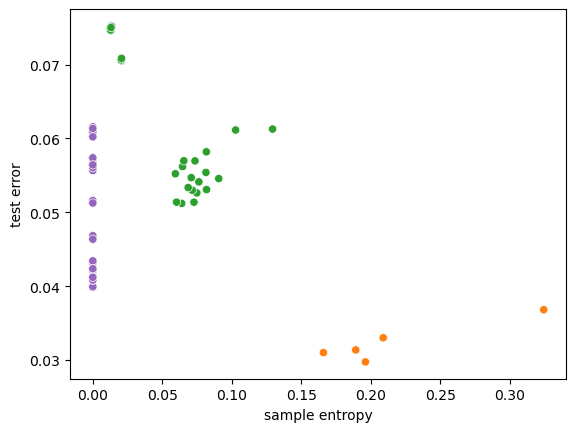

In [8]:
models = ['mnist_rand_init_10', 
          'mnist_stochastic_rand_init_10',
          'mnist_rand_init_temp', 
          'mnist_stochastic_rand_init_temp',
          'mnist_rand_init_importance',
          ]

models = 'mnist_rand_init_10|mnist_stochastic_rand_init_10|mnist_rand_init_temp|mnist_stochastic_rand_init_temp|mnist_rand_init_importance'

data_mean = data.groupby('filename').mean().reset_index()

model_data = data_mean[data_mean['filename'].str.contains(models)]
x = model_data['sample entropy']
print(x)
y = model_data['test error']

hues = []
for filename in model_data.filename:
    for model in models.split('|'):
        if model in filename:
            hues.append(model)
sns.scatterplot(x=x,y=y,hue=hues, legend=False)
